In [1]:
# Starting with the name of Almighty God
# In God We Trust

In [25]:
import numpy
import scipy.special

class NeuralNetwork:
    # initialize
    def __init__(self, inputNode, hiddenNode, outputNode, learningRate):
        self.inputNode = inputNode
        self.hiddenNode = hiddenNode
        self.outputNode = outputNode
        self.learningRate = learningRate
        
        self.inToHiddenWeight = (numpy.random.rand(self.hiddenNode, self.inputNode)) - 0.5
        self.hiddenToOutWeight = (numpy.random.rand(self.outputNode, self.hiddenNode)) - 0.5
        
        # sigmoid function
        self.activation_func  = lambda x: scipy.special.expit(x)
        pass
    
    # train neural network
    def train(self, inputs_list, target_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(target_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.inToHiddenWeight, inputs)
        hidden_outputs = self.activation_func(hidden_inputs)
        
        final_inputs = numpy.dot(self.hiddenToOutWeight, hidden_outputs)        
        final_outputs = self.activation_func(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.hiddenToOutWeight.T, output_errors)
        
        self.hiddenToOutWeight += self.learningRate * numpy.dot(output_errors * final_outputs * (1.0 - final_outputs), numpy.transpose(hidden_outputs))
        self.inToHiddenWeight += self.learningRate * numpy.dot(hidden_errors * hidden_outputs * (1.0 - hidden_outputs), numpy.transpose(inputs))
        
        pass
    
    # query in the network
    def query(self, inputs_list):
        # convert input list to it's transpose
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # propagate from input to hidden layer
        hidden_inputs = numpy.dot(self.inToHiddenWeight, inputs)
        # apply activation function on hidden layer. this will be input to final output node
        hidden_outputs = self.activation_func(hidden_inputs)
        
        # propagate from hidden to output
        final_inputs = numpy.dot(self.hiddenToOutWeight, hidden_outputs)
        # apply activation function to produce final outcome
        final_outputs = self.activation_func(final_inputs)
        return final_outputs
    

In [26]:
nn = NeuralNetwork(3, 3, 3, .3)
input = [1.0, 0.5, -1.5]

In [27]:
num_innodes = 784
num_hiddennodes = 100
num_outnodes = 10

learning_rate = .3

In [28]:
nn = NeuralNetwork(num_innodes, num_hiddennodes, num_outnodes, learning_rate)

In [29]:
data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [30]:
for record in data_list:
    all_values = data_list[0].split(',')
    inputs = (numpy.asfarray(all_values[1:]) / 255.0) * .99 + 0.01
    targets = numpy.zeros(num_outnodes) + 0.01
    targets[int(all_values[0])] = 0.99
    nn.train(inputs, targets)
    pass


In [32]:
test_data_file = open("mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

5


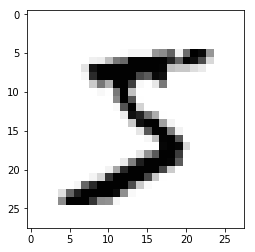

In [34]:
import numpy
import matplotlib.pyplot
%matplotlib inline
all_values = data_list[0].split(',')
print(all_values[0])
image_array = numpy.asfarray(all_values[1:]).reshape(28, 28)
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [35]:
query_data = (numpy.asfarray(all_values[1:]) / 255.0) * .99 + 0.01
query_result = nn.query(query_data)

In [36]:
print(query_result)

[[ 0.01681212]
 [ 0.01427492]
 [ 0.01579216]
 [ 0.012569  ]
 [ 0.01677694]
 [ 0.98502507]
 [ 0.01597938]
 [ 0.01790037]
 [ 0.01614304]
 [ 0.01625006]]
